IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

DJERFAF Ilyes\
TAFOUGHALT Anyes

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [18]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Importation de la librairie pickle
import pickle as pkl

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes

In [3]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [4]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [5]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

# Import de notre iads :
L'ensemble des fonctions qu'on a développé dans les premiers TME 

In [32]:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

In [33]:
# iads doit être dans le répertoire père du répertoire courant !
import iads as iads

In [34]:
# importation de Classifiers
from iads import Classifiers as classif

In [35]:
# importation de utils
from iads import utils as ut

# Dataset : data-2D.pkl

## Expérimentation KNN

### Détermination de la zone de pic de K

<span style="color:blue">

-   En utilisant le graph d'accuracy en fonction de k, on peut identifier la complexité du modèle. Si la valeur de k est faible, le modèle sera plus complexe et s'ajustera mieux aux données d'entraînement. Cependant, cela peut entraîner un surapprentissage (overfitting) et une moins bonne performance sur les données de test. Si la valeur de k est élevée, le modèle sera plus simple et risque de sous-apprendre (underfitting), ce qui peut également entraîner une moins bonne performance sur les données de test.

-   Le graph d'accuracy de test en fonction de k peut être utilisé pour déterminer la valeur optimale de k. Cette valeur correspond à celle qui donne la meilleure performance sur les données de test (Pic). 

</span>

<span style="color:red">
Il est important de noter que cette valeur optimale peut varier en fonction du jeu de données et des caractéristiques spécifiques de chaque problème.
</span>

In [37]:
def crossval_strat(X, Y, n_iterations, iteration):
    index_pos = [i for i in range(len(Y)) if Y[i] == 1]
    index_neg = [i for i in range(len(Y)) if Y[i] == -1]

    index_pos_test = index_pos[iteration*(len(index_pos) // n_iterations): (
        iteration+1)*(len(index_pos) // n_iterations)]
    index_neg_test = index_neg[iteration*(len(index_neg) // n_iterations): (
        iteration+1)*(len(index_neg) // n_iterations)]

    Xtest = np.concatenate((X[index_neg_test], X[index_pos_test]))
    Ytest = np.concatenate((Y[index_neg_test], Y[index_pos_test]))

    #index_pos_app =  index_pos[:iteration*(len(index_pos) // n_iterations )] + index_pos[(iteration+1)*(len(index_pos) // n_iterations ) :]
    #index_neg_app = index_neg[:iteration*(len(index_neg) // n_iterations)] + index_neg[(iteration+1)*(len(index_neg) // n_iterations ) :]
    index_app = [i for i in range(len(Y)) if (
        (i not in index_pos_test) and (i not in index_neg_test))]

    Xapp = X[index_app]
    Yapp = Y[index_app]
    return Xapp, Yapp, Xtest, Ytest


#### Stratégie : 1- Prendre un K tres grand pour situer la zone de pic

In [38]:
k_values = list(range(1, 100, 16))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train=0
    it_test=0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train+=classifierKNN.accuracy(Xapp, Yapp)
        it_test+=classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/iter)
    knn_accuracy_test.append(it_test/iter)

##### Ploter les résultats

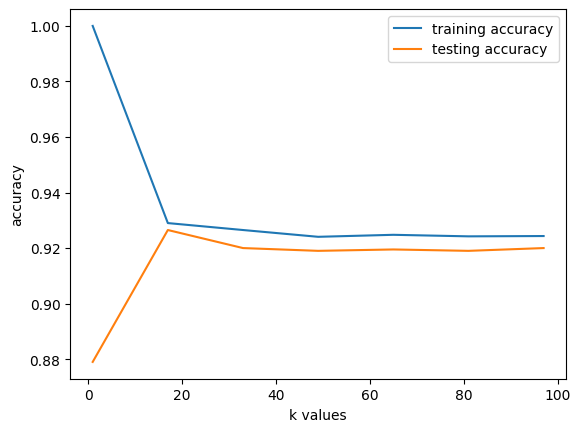

In [39]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

##### Analyse des résultats

<span style="color:blue">

-   En analysant le graph de testing accuracy, on remarque que le pic d'accuracy du test est entre k<20 et k>10

-   Maintenant, on va extraire la valeur exacte du k pour le pic

</span>


#### Stratégie : 2- Extraire la valeur de K

In [40]:
k_values = list(range(11, 20, 2))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train=0
    it_test=0
    
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train+=classifierKNN.accuracy(Xapp, Yapp)
        it_test+=classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)


##### Ploter les résultats

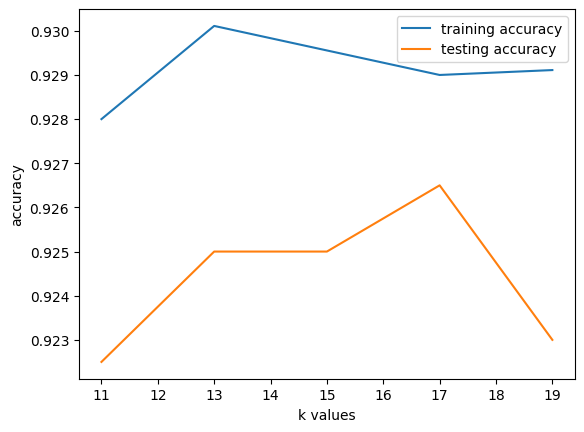

In [41]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

##### Analyse des résultats
<span style="color:blue">

-   Pour notre premier dataset "Data-2D" la valeur de k optimal est : **17**

</span>

## Expérimentation Perceptron

### Variation de réglage d'initialisation

In [ ]:
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
perceptron_accuracy_test = []
perceptron_accuracy_train = []
niter = 10
for i in range(niter):
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, niter, i)
    # Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
    perceptron = classif.ClassifierPerceptron(2)
    
for k in range(1, 70, 16):
    print(k)
    
    it_train = 0
    it_test = 0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)

# -----
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []


# Réalisation de N itérations
N = 100
print("Init perceptron w=", perceptron1.w)
for i in range(N):
    perceptron1.train_step(data_train, label_train)
    train_acc.append(perceptron1.accuracy(data_train, label_train))
    test_acc.append(perceptron1.accuracy(data_test, label_test))


# -----
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1, N+1), train_acc, test_acc)
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

# -----
# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(data_gauss_desc, data_gauss_label, perceptron1, step=150)
plot2DSet(data_gauss_desc, data_gauss_label)

print("Accuracy finale (train): ", perceptron1.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron1.accuracy(data_test, label_test))


### Variation du learning rate

## Expérimentation Perceptron Biais

# Dataset : data-5D.pkl